1. Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one for the background). Add Gaussian noise to the image. Implement and test Otsu’s algorithm with this image.

Creating the original greyscale image and the image with gaussian noise

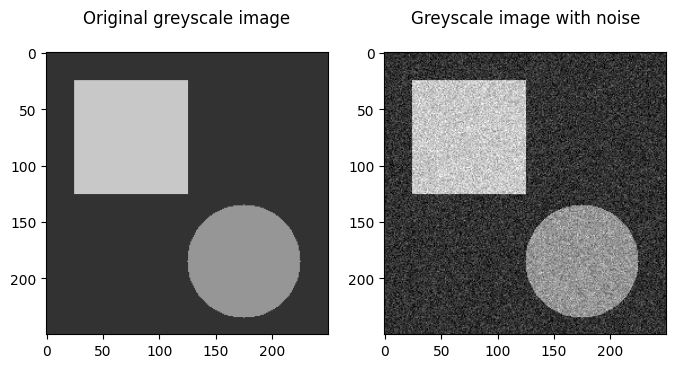

In [11]:
#import necessory libraries 
import numpy as np
import cv2
from queue import Queue
import matplotlib.pyplot as plt
# Creating a black image of size 250 x 250 for the background
img_original = np.zeros((250, 250), dtype=np.uint8)
# Define the vertices of the square
square_points = np.array([[25, 25], [125, 25], [125, 125], [25, 125]])
# Draw the filled square with a pixel value of 200
cv2.fillPoly(img_original, [square_points], color=200)
# Drawing a filled circle with pixel value of 150
cv2.circle(img_original, (175, 185), 50, color=150, thickness=-1)

# Setting the background to pixel value 50
img_original[img_original == 0] = 50
# Creating the image with gaussian noise (mean = 0, sigma, shape of the image)
gaussian = np.random.normal(0, np.sqrt(500), img_original.shape)
img_noise = gaussian + img_original
img_noise = np.clip(img_noise, 0, 255)
# Creating a figure with two subplots and display original image and the image with gaussian noise
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].imshow(img_original, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Original greyscale image\n")
axs[1].imshow(img_noise, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Greyscale image with noise\n")
plt.show()

Computing the Otsu’s algorithm with Greyscale image with noise

Threshold value obtained using Otsu s algorithm = 116


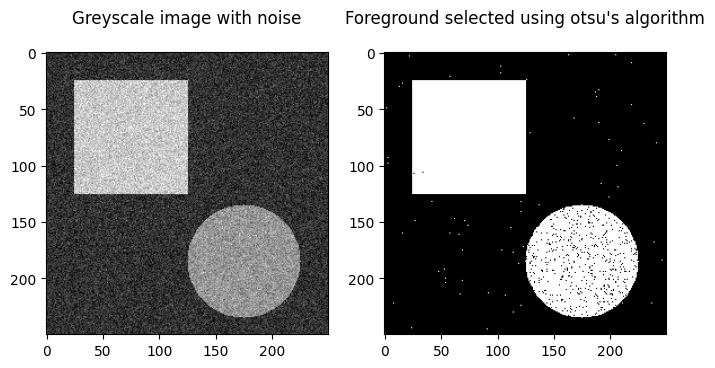

In [13]:
# Computing histogram of image
histogram, bin_edges = np.histogram(img_noise, bins=256, range=(0, 255))
# Computing probability mass function of image
prob = histogram / float(np.sum(histogram))
# Initializing variables
best_threshold = 0
best_variance = 0
total_mean = np.mean(img_noise)
# Iterating over all possible threshold values
for t in range(int(np.min(img_noise)), int(np.max(img_noise)) + 1):
 # Computing sum of probabilities of foreground and background classes seperated by t
 prob_f = np.sum(prob[:t])
 prob_b = np.sum(prob[t:])
 # Skipping the iteration if probabilities are empty
 if prob_f == 0 or prob_b == 0:continue
 # Computing means of foreground and background classes
 mean_f = np.sum(prob[:t] * np.arange(t)) / prob_f
 mean_b = np.sum(prob[t:] * np.arange(t, 256)) / prob_b
 # Computing variance between foreground and background classes
 variance = prob_f * prob_b * (mean_f - mean_b) ** 2
 # Updating best threshold and variance if the variance is greater than current variance
 if variance > best_variance: 
   best_threshold = t
   best_variance = variance
print(f'Threshold value obtained using Otsu s algorithm = {best_threshold}')
output = cv2.threshold(img_noise, best_threshold, 255,
cv2.THRESH_BINARY)[1]
# Creating a figure with two subplots representig noisy image and foreground selected
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].imshow(img_noise, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Greyscale image with noise\n")
axs[1].imshow(output, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Foreground selected using otsu's algorithm\n")
plt.show()

2. Implement a region-growing technique for image segmentation. The basic idea is to start from a set of points inside the object of interest (foreground), denoted as seeds, and recursively add neighboring pixels as long as they are in a pre-defined range of the pixel values of the seeds.

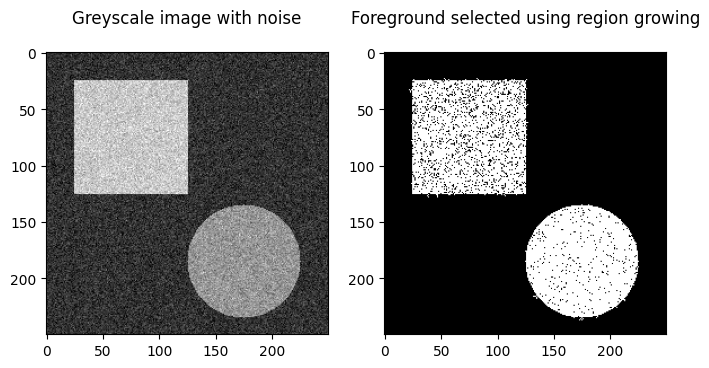

In [14]:
# Defining the range of pixel values for region growing
pixel_range = 50
# Defining the seeds as x, y coordinates (one seed for each object)
seeds = [(75, 75), (175, 185)] # [Square, circle]
# Creating a binary mask to store the segmentation result
mask = np.zeros([250,250])
# Defining a function to check if the given pixel value is within the range of seeds
def check_range(pixel):
    for seed in seeds:
        if abs(img_noise[pixel] - img_noise[seed]) <= pixel_range:
            return True
    return False
# Region growing for all seeds
for seed in seeds:
    pix_queue = Queue()
    pix_queue.put(seed)
    while not pix_queue.empty():
        pixel = pix_queue.get()
        if mask[pixel] == 0 and check_range(pixel):
            mask[pixel] = 1
            x, y = pixel
            neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1), (x-1, y-1),(x-1, y+1), (x+1, y-1), (x+1, y+1)]
            for neighbor in neighbors:
                if (0 <= neighbor[0] < img_noise.shape[0] and 0 <= neighbor[1]< img_noise.shape[1]):
                    pix_queue.put(neighbor)
# Creating a figure with two subplots representing noisy image and foreground selected
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].imshow(img_noise, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Greyscale image with noise\n")
axs[1].imshow(mask, cmap='gray', vmin=0, vmax=1)
axs[1].set_title("Foreground selected using region growing\n")
plt.show()